## Imports

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split

In [48]:
sns.set_style('darkgrid')

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/KennedyRMenezes/DataScience/refs/heads/master/Datasets/Preco_casas/Pre%C3%A7os_de_casas.csv")

## Significado das colunas do Data Set

- area_primeiro_andar: Refere-se à área do primeiro andar da propriedade, medida em metros quadrados.

- existe_segundo_andar: Esta variável é binária, indicando se a propriedade possui ou não um segundo andar.
  - Pode ser representada como 1 para "sim" e 0
para "não".

- area_segundo_andar: Se a propriedade tiver um segundo andar, esta variável representa a área total do segundo andar, medida em metros quadrados.

- quantidade_banheiros: Indica o número total de banheiros na propriedade.

- capacidade_carros_garagem: Esta variável indica a capacidade da garagem da casa

- propriedade, ou seja, o número máximo de carros que podem ser estacionados na garagem.

- qualidade_da_cozinha_Excelente: Esta é uma variável categórica que avalia a qualidade da cozinha na propriedade.
 - Se a cozinha for considerada "Excelente" é representada por 1, e caso contrário, por 0.

- preco_de_venda: Este é o preço de venda da propriedade em reais. É a variável alvo que se tenta prever usando os outros atributos da propriedade.

### Exploração e Tratamento

In [50]:
df.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [51]:
df.describe()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
count,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1438.000000,1.438000e+03
mean,730.939499,106.602556,0.431154,31.888410,1.556328,470.381780,0.065369,8.802488e+05
std,422.336441,33.040598,0.495410,39.952846,0.542512,211.875916,0.247261,3.697203e+05
min,1.000000,31.028600,0.000000,0.000000,0.000000,0.000000,0.000000,1.720570e+05
25%,364.250000,81.682325,0.000000,0.000000,1.000000,326.000000,0.000000,6.384350e+05
50%,733.500000,100.332000,0.000000,0.000000,2.000000,477.500000,0.000000,7.980438e+05
75%,1096.750000,127.458800,1.000000,67.631200,2.000000,576.000000,0.000000,1.045160e+06
max,1460.000000,223.145800,1.000000,168.892200,3.000000,1390.000000,1.000000,3.081250e+06


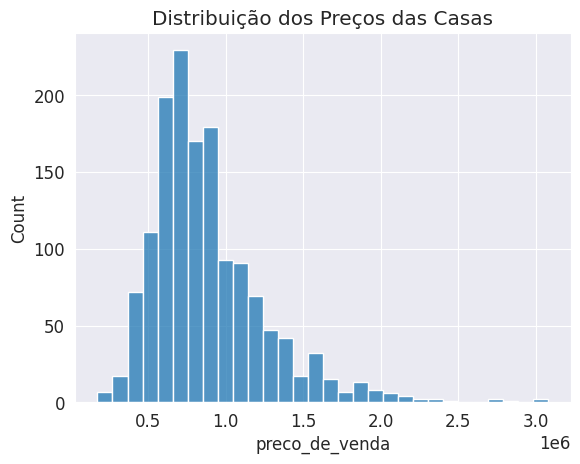

In [52]:
sns.histplot(data=df, x='preco_de_venda', bins=30)
plt.title('Distribuição dos Preços das Casas')
plt.show()

<Axes: >

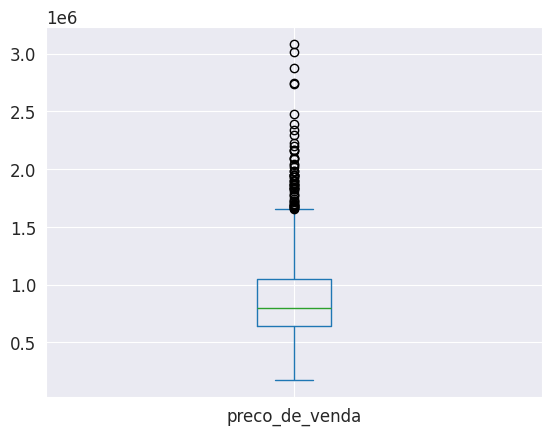

In [53]:
df['preco_de_venda'].plot(kind="box")

In [54]:
Q1 = df['preco_de_venda'].quantile(0.25)
Q3 = df['preco_de_venda'].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados sem outliers
df_sem_outliers = df[(df['preco_de_venda'] >= limite_inferior) & (df['preco_de_venda'] <= limite_superior)]
print(len(df) -len(df_sem_outliers))


59


In [55]:
df = df_sem_outliers.reset_index(drop=True)

Coluna 'capacidade_carros_garagem' veio na casa das centenas com milhar, dividi por 100 para fazer mais sentido.

In [56]:
# Essa alteração não fez diferença nas métricas do sistema.
# df['capacidade_carros_garagem'] = [int(x/100) for x in df['capacidade_carros_garagem']]

In [57]:
df['capacidade_carros_garagem'].describe()

,capacidade_carros_garagem
count,1379.000000
mean,456.029007
std,201.563887
min,0.000000
25%,312.000000
50%,467.000000
75%,572.000000
max,1390.000000


Fiz uma combinação de coluna para, talvez depois, retirar area primeiro e segundo andar.

In [58]:
df["area_total"] = df["area_primeiro_andar"] + df["area_segundo_andar"]

Troca a penultima e ultima coluna de lugar.

O target que é o 'preco_de_venda' não estava na última coluna.

In [59]:
df = df[[col for col in df.columns if col != 'preco_de_venda'] + ['preco_de_venda']]

In [60]:
df

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,area_total,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,158.8590,1027905.00
1,2,117.2398,0,0.0000,2,460,0,117.2398,894795.00
2,3,85.4680,1,80.4514,2,608,0,165.9194,1101855.00
3,4,89.2769,1,70.2324,1,642,0,159.5093,690200.00
4,5,106.3705,1,97.8237,2,836,0,204.1942,1232500.00
...,...,...,...,...,...,...,...,...,...
1374,1456,88.5337,1,64.4726,2,460,0,153.0063,862750.00
1375,1457,192.5817,0,0.0000,2,500,0,192.5817,1035300.00
1376,1458,110.3652,1,107.0208,2,252,0,217.3860,1313845.00
1377,1459,100.1462,0,0.0000,1,240,0,100.1462,700676.25


Mudando a coluna de 'area_total' para a quinta posição para ficar visualmente mais interessante.

In [61]:
cols = [col for col in df.columns if col != "area_total"]

cols.insert(4, 'area_total')

df = df[cols]

In [62]:
df

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,area_total,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,158.8590,2,548,0,1027905.00
1,2,117.2398,0,0.0000,117.2398,2,460,0,894795.00
2,3,85.4680,1,80.4514,165.9194,2,608,0,1101855.00
3,4,89.2769,1,70.2324,159.5093,1,642,0,690200.00
4,5,106.3705,1,97.8237,204.1942,2,836,0,1232500.00
...,...,...,...,...,...,...,...,...,...
1374,1456,88.5337,1,64.4726,153.0063,2,460,0,862750.00
1375,1457,192.5817,0,0.0000,192.5817,2,500,0,1035300.00
1376,1458,110.3652,1,107.0208,217.3860,2,252,0,1313845.00
1377,1459,100.1462,0,0.0000,100.1462,1,240,0,700676.25


Renomeando colunas

In [63]:
df.rename(columns={'area_primeiro_andar': 'area_1_andar',
                   'existe_segundo_andar': 'segundo_andar',
                   'area_segundo_andar': 'area_2_andar',
                   'quantidade_banheiros': 'num_banheiros',
                   'capacidade_carros_garagem': 'capacidade_garagem',
                   'qualidade_da_cozinha_Excelente': 'qualidade_cozinha'}, inplace=True)

Verificando a distribuição das colunas numéricas

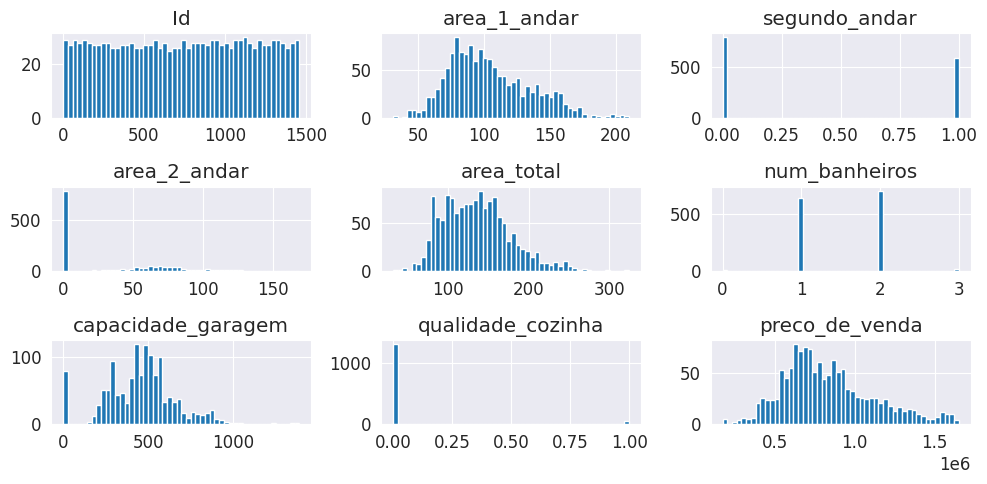

In [64]:
plt.rc('font', size=12)
df.hist(bins=50, figsize=(10,5))
plt.tight_layout()
plt.show()

In [65]:
# Melhor reta
px.scatter(df, x='area_total', y='preco_de_venda', trendline_color_override="red", trendline='ols')

### Criando o conjunto de testes

Criando o conjunto de testes estratificado, pois poucos dados.

### Analisando a estratificação

Antes de criar o conjunto de testes seria interessante descobrir o atributo que possui mais correlação com a variável dependente e então estratificar por essa variável.

In [66]:
df = df.drop(columns=['area_1_andar', 'area_2_andar', "Id"])
df

,segundo_andar,area_total,num_banheiros,capacidade_garagem,qualidade_cozinha,preco_de_venda
0,1,158.8590,2,548,0,1027905.00
1,0,117.2398,2,460,0,894795.00
2,1,165.9194,2,608,0,1101855.00
3,1,159.5093,1,642,0,690200.00
4,1,204.1942,2,836,0,1232500.00
...,...,...,...,...,...,...
1374,1,153.0063,2,460,0,862750.00
1375,0,192.5817,2,500,0,1035300.00
1376,1,217.3860,2,252,0,1313845.00
1377,0,100.1462,1,240,0,700676.25


In [67]:
df_corr_preco = df.corr()['preco_de_venda'].sort_values(ascending=False)
df_corr_preco

,preco_de_venda
preco_de_venda,1.000000
area_total,0.699198
capacidade_garagem,0.611040
num_banheiros,0.576560
qualidade_cozinha,0.319723
segundo_andar,0.153808


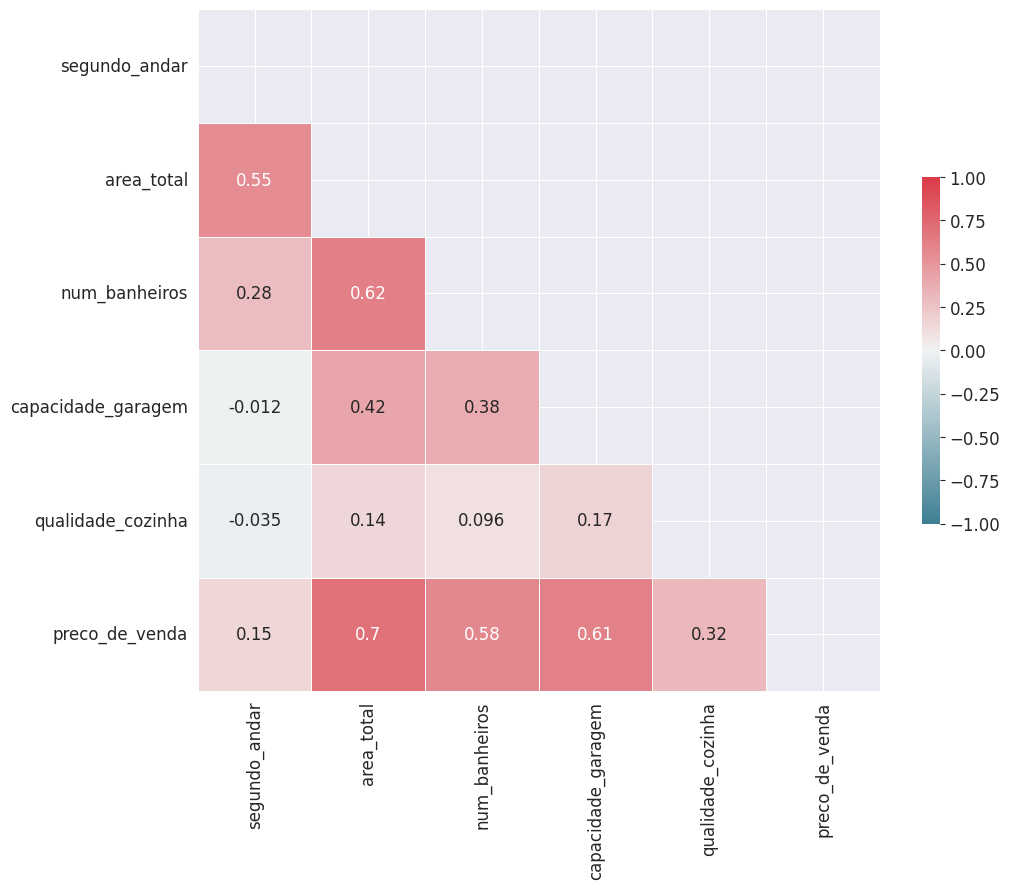

In [68]:
# Atividade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correlação
corr = df.corr()

# Quais fatores estão mais correlacionados?

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

# Configurar a figura do matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Gerar o mapa de calor (heatmap)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

Podemos verificar que area_total tem a maior correlação com o preco_de_venda, então fazer uma estratificação para podermos fazer o conjunto testes representativo.

Mas antes disso, seria interessante retirar as colunas de area_primeiro_andar e area_segundo_andar já que area_total é composta por essas duas.

Fazendo a estratificação

In [69]:
df['area_total'].describe()

,area_total
count,1379.000000
mean,135.070267
std,41.660571
min,31.028600
25%,103.211900
50%,132.661200
75%,159.788000
max,324.499700


In [70]:
print("Amplitude: ", ( df['area_total'].max() - df['area_total'].min() ) / 5)
estrat = list(np.arange(31, 336, 80))
# remove ultimo elemento para colocar inf
estrat.pop(-1)
estrat.append(np.inf)
# adiciona limite inferior de zero
estrat.insert(0,0)
print("Limites para a estratificação: ", estrat)

Amplitude:  58.694219999999994
Limites para a estratificação:  [0, np.int64(31), np.int64(111), np.int64(191), inf]


In [71]:
df['area_categoria'] = pd.cut(df['area_total'],
                              bins=estrat,
                              labels=[1,2,3,4])

<Axes: >

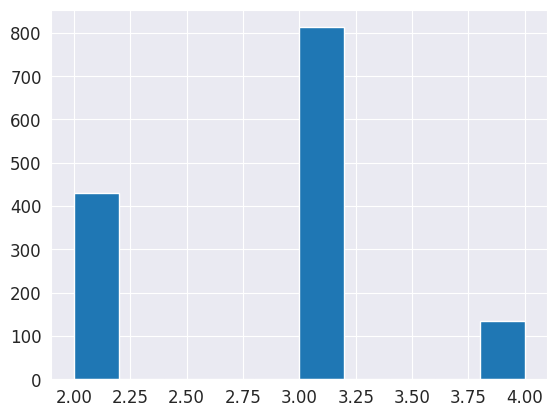

In [72]:
df['area_categoria'].hist()

### Verificando a proporção da estratificação

Vamos verificar a proporção

In [73]:
unique_vals_cat = df['area_categoria'].unique()

total = len(df['area_categoria'])

for i in unique_vals_cat:
  count_val = (df['area_categoria'] == i).sum()
  print(round(count_val/total, 2)*100)

# Outra maneira de verificar as proporções
# prop = df['area_categoria].value_counts(normalize=True)

59.0
10.0
31.0


In [74]:
cols = [col for col in df.columns if col != 'area_categoria']

cols.insert(3, 'area_categoria')

df = df[cols]

In [75]:
df

,segundo_andar,area_total,num_banheiros,area_categoria,capacidade_garagem,qualidade_cozinha,preco_de_venda
0,1,158.8590,2,3,548,0,1027905.00
1,0,117.2398,2,3,460,0,894795.00
2,1,165.9194,2,3,608,0,1101855.00
3,1,159.5093,1,3,642,0,690200.00
4,1,204.1942,2,4,836,0,1232500.00
...,...,...,...,...,...,...,...
1374,1,153.0063,2,3,460,0,862750.00
1375,0,192.5817,2,4,500,0,1035300.00
1376,1,217.3860,2,4,252,0,1313845.00
1377,0,100.1462,1,2,240,0,700676.25


### Construção do teste estratificado

In [76]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=101)

for train_index, test_index in splitter.split(df, df['area_categoria']):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

In [77]:
strat_test_set['area_categoria'].value_counts() / len(strat_test_set)

,count
area_categoria,
3,0.589372
2,0.311594
4,0.099034
1,0.000000


Comparação entre uma separação estratificada e uma não estratificada

In [78]:
def area_proportion(data):
  return data['area_categoria'].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.3, random_state=101)

compare_props = pd.DataFrame({
    "Overall %": area_proportion(df),
    "Stratified %": area_proportion(strat_test_set),
    "Random %": area_proportion(test_set),
}).sort_index()

compare_props.index.name = "Area Categoria"
compare_props['Strat. Error %'] = (compare_props['Stratified %'] / compare_props['Overall %'] - 1)
compare_props['Rand. Error %'] = (compare_props['Random %'] / compare_props['Overall %'] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Area Categoria,,,,,
1,0.00,0.00,0.00,NaN,NaN
2,31.25,31.16,31.64,-0.30,1.24
3,58.96,58.94,60.39,-0.03,2.43
4,9.79,9.90,7.97,1.16,-18.58


In [79]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('area_categoria', axis=1, inplace=True)

### Preparando dados para Machine Learning

In [80]:
casa = strat_train_set.drop("preco_de_venda", axis=1)
casa_target = strat_train_set["preco_de_venda"].copy()

In [81]:
casa

,segundo_andar,area_total,num_banheiros,capacidade_garagem,qualidade_cozinha
400,0,111.1084,1,297,0
77,1,198.9918,2,509,0
683,0,106.2776,1,264,0
564,1,127.7375,1,544,0
876,0,69.3963,1,528,0
...,...,...,...,...,...
674,0,157.7442,2,768,1
900,1,131.5464,2,484,0
591,0,125.4150,1,520,0
1009,1,161.6460,1,240,0


Serve para verificar se há dados faltantes, não é o caso desse conjunto de dados.

In [82]:
null_rows_idx = df.isnull().any(axis=1)
df.loc[null_rows_idx].head()

,segundo_andar,area_total,num_banheiros,area_categoria,capacidade_garagem,qualidade_cozinha,preco_de_venda


Usando Imputer para colocar a mediana nos dados.

Usando Standardize para normalizar os dados em uma escala semelhante.

Usando Pipeline para agregar as trasnformações.

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [84]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler()),
])

In [85]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('standardize', StandardScaler())])

### Selecionando e Treinando um Modelo


#### Training and Evaluating on the Training Set

In [86]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(num_pipeline, LinearRegression())
lin_reg.fit(casa, casa_target)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('standardize', StandardScaler())])),
                ('linearregression', LinearRegression())])

In [87]:
casa_pred = lin_reg.predict(casa)
casa_pred[:5].round(-2)

array([ 669300., 1061200.,  637800.,  708300.,  599300.])

Comparar com com os valores reais

In [88]:
casa_target.iloc[:5].values

array([685270., 953955., 647802., 695130., 393907.])

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(casa_target, casa_pred)
mse = mean_squared_error(casa_target, casa_pred)
r2 = r2_score(casa_target, casa_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"R²:   {r2:.2f}")

MAE:  113897.53
MSE:  25418536008.97
RMSE: 159431.92
R²:   0.68


Medidas alterando dataset

In [90]:
# COM OUTLIERS
# MAE:  128623.76
# MSE:  35263641927.25
# RMSE: 187786.16
# R²:   0.74

# SEM OUTLIERS
# MAE:  114225.06
# MSE:  25513641110.21
# RMSE: 159729.90
# R²:   0.68

# SEM OUTLIERS e SEM COLUNA qualidade_cozinha
# MAE:  116967.42
# MSE:  27390637342.55
# RMSE: 165501.17
# R²:   0.66

# SEM OUTLIERS E SÓ COM COLUNAS DE area_total E preco_de_venda
# MAE:  152440.04
# MSE:  41667095889.14
# RMSE: 204125.20
# R²:   0.48

Histograma de Resíduos

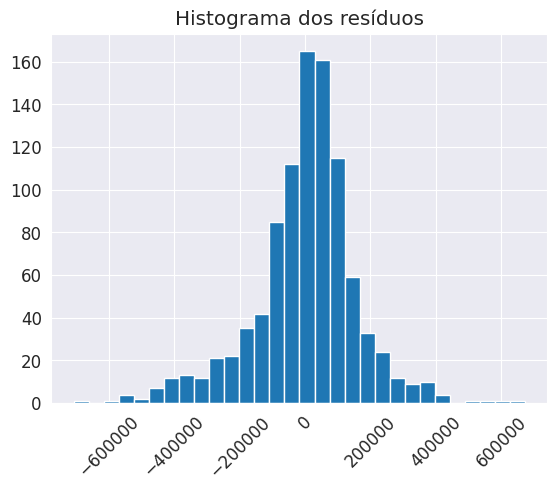

In [91]:
residuos = casa_target - casa_pred

plt.hist(residuos, bins=30)
plt.title('Histograma dos resíduos')
plt.xticks(rotation=45)
plt.show()

Presença de Heterocedasticidade pode comprometer o modelo, já que para valores acima de 1M e erro cresce.

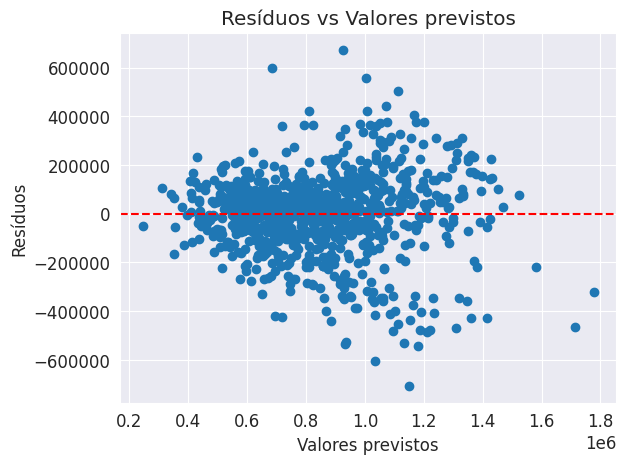

In [92]:
plt.scatter(casa_pred, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores previstos')
plt.show()


### Testando agora com Árvores de Regressão

In [94]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(num_pipeline, DecisionTreeRegressor(random_state=42))
tree_reg.fit(casa, casa_target)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                 ('standardize', StandardScaler())])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [95]:
casa_pred_t = tree_reg.predict(casa)
tree_rmse = np.sqrt(mean_squared_error(casa_target, casa_pred_t))
tree_rmse

np.float64(8760.317532134906)

### Better Evaluation Using Cross-Validation

In [96]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, casa, casa_target,
                              scoring="neg_root_mean_squared_error", cv=10)

In [97]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,214772.539537
std,18983.802663
min,184364.927337
25%,202865.040305
50%,211357.816948
75%,230223.019006
max,243305.805288


Algo interessante de se notar aqui. Deixando a Árvore de Regressão ser validada no mesmo conjunto de dados em que foi treinada ela apresenta uma erro extremamente baixo, o que significa que ela está com overfitting.

Quando usamos Cross-Validation para avaliar o modelo vemos que ele generaliza pior que a Regressão Linear (RMSE: 159431.92). Já que o Cross-Validation usa dados não vistos (e muitas rodadas de divisão dos mesmos dados) para treinar e avaliar o sistema.

Façamos uma validação cruzada para a Regressão Linear também.

In [98]:
lin_rmses = -cross_val_score(lin_reg, casa, casa_target,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,159847.986984
std,21075.583560
min,126700.785461
25%,143639.678962
50%,164056.752645
75%,172045.477881
max,195129.394751


Modelo de Regressão Linear mais consistente. Pois Árvore de Decisão está sobreajustando aos dados.

Testemos agora a RandomForestRegressor.

In [99]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(num_pipeline, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, casa, casa_target,
                                scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,164926.904452
std,20625.585967
min,128611.018742
25%,156788.505656
50%,167943.714415
75%,174861.967954
max,196841.337816


### Ajuste seu Modelo

#### Grid Search

In [103]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", num_pipeline),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {'random_forest__max_features': [4, 6, 8]},
    {'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(casa, casa_target)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        Pipeline(steps=[('imputer',
                                                         SimpleImputer(strategy='median')),
                                                        ('standardize',
                                                         StandardScaler())])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6, 8]},
                         {'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [104]:
grid_search.best_params_

{'random_forest__max_features': 4}

In [107]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# extra code – these few lines of code just make the DataFrame look nicer
cv_res = cv_res[["param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
0,4,161844,156583,176893,165107
1,6,161201,157999,180533,166578
2,8,161201,157999,180533,166578
3,6,161201,157999,180533,166578
4,8,161201,157999,180533,166578


#### Randomized Search

In [108]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(casa, casa_target)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              Pipeline(steps=[('imputer',
                                                               SimpleImputer(strategy='median')),
                                                              ('standardize',
                                                               StandardScaler())])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d5a330da7d0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [110]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
9,4,161844,156583,176893,165107
0,8,161201,157999,180533,166578
1,16,161201,157999,180533,166578
2,12,161201,157999,180533,166578
4,8,161201,157999,180533,166578


### Analyze the Best Models and Their Errors

In [111]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.03, 0.48, 0.15, 0.32, 0.03])

In [112]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(np.float64(0.4786908058380922), 'area_total'),
 (np.float64(0.3173272746150637), 'capacidade_garagem'),
 (np.float64(0.15129517022289962), 'num_banheiros'),
 (np.float64(0.027343988820211062), 'qualidade_cozinha'),
 (np.float64(0.02534276050373331), 'segundo_andar')]

In [114]:
X_test = strat_test_set.drop("preco_de_venda", axis=1)
y_test = strat_test_set["preco_de_venda"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print(final_rmse)

169976.55604595423


Intervalo de 95% de Confiança

In [115]:
from scipy import stats

def rmse(squared_errors):
    return np.sqrt(np.mean(squared_errors))

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
boot_result = stats.bootstrap([squared_errors], rmse,
                              confidence_level=confidence, random_state=42)
rmse_lower, rmse_upper = boot_result.confidence_interval

In [116]:
rmse_lower, rmse_upper


(np.float64(154644.5455755128), np.float64(187004.34824619998))